### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad (y) de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
lista_edad_altura = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82),("Pablo Martínez",28,1.81),("Javier Araiz Miranda", 30, 1.80)]

In [3]:
altura = []
edad = []
for a in range(len(lista_edad_altura)):
    altura.append(lista_edad_altura[a][2])
    edad.append(lista_edad_altura[a][1])
    

In [4]:
X = np.array(altura)
y = np.array(edad)

In [5]:
X = X.reshape(-1, 1)

In [6]:
X

array([[1.66],
       [1.87],
       [1.78],
       [1.6 ],
       [1.79],
       [1.86],
       [1.54],
       [1.61],
       [1.52],
       [1.82],
       [1.77],
       [1.7 ],
       [1.78],
       [1.63],
       [1.73],
       [1.85],
       [1.78],
       [1.7 ],
       [1.64],
       [1.82],
       [1.81],
       [1.8 ]])

In [7]:
# Partimos en conjuntos "train" y "test".

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (17, 1)
X_test: (5, 1)
y_train: (17,)
y_test: (5,)


In [9]:
model_edad_altura = LinearRegression()

In [10]:
model_edad_altura.fit(X_train, y_train)

LinearRegression()

In [11]:
print("Secante:", model_edad_altura.intercept_)
print("Pendiente:", model_edad_altura.coef_)

Secante: 22.140222175644524
Pendiente: [4.49241948]


In [12]:
predict = model_edad_altura.predict(X_test)

In [13]:
model_edad_altura.score(X_train, y_train) * 100

1.1761505394404015

In [14]:
model_edad_altura.score(X_test, y_test) *100

-118.38566314252299

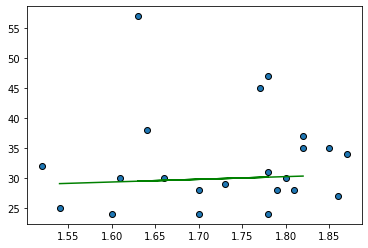

In [15]:
plt.scatter(X, y, edgecolors= 'black')
plt.plot(X_test, predict, c = 'g')

### La regresión lineal no es una buena técnica para este tipo de problemas ya que, por encima de una determinada edad, deja de existir relación entre altura y edad.


In [16]:
predict

array([30.31642563, 29.46286593, 30.09180465, 30.13672885, 29.05854817])

In [17]:
y_test

array([35, 57, 45, 47, 25])

In [18]:
for i, (real, prediccion) in enumerate(zip(y_test, predict)):
    print('posición ' + str(i) + ': ' + str(real - prediccion))

posición 0: 4.6835743729476675
posición 1: 27.537134073918814
posición 2: 14.908195346887442
posición 3: 16.86327115209949
posición 4: -4.0585481729895925


In [19]:
print('MSE:', mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predict)))

MSE: 260.6651275269154
RMSE: 16.145127052052437


El mejor para este problema es el RMSE, el cual representa de la manera más acertada el error cometido.

In [20]:
lista_edad_altura

[('Clara Piniella', 30, 1.66),
 ('Daniel Walker', 34, 1.87),
 ('Leonardo Frazzetto', 31, 1.78),
 ('Xinru Yang', 24, 1.6),
 ('Jorge Garcia', 28, 1.79),
 ('Jonathan Suárez', 27, 1.86),
 ('Marina Serrano', 25, 1.54),
 ('Karina Inche', 30, 1.61),
 ('Mary Meza', 32, 1.52),
 ('Borja Puig', 37, 1.82),
 ('Mauro Garcia-Oliva', 45, 1.77),
 ('José Carlos Batista', 28, 1.7),
 ('Isabel Palomares', 24, 1.78),
 ('Gina Garrido', 57, 1.63),
 ('Sonia Cobo', 29, 1.73),
 ('Miguel Barquero', 35, 1.85),
 ('Nacho Astorga', 47, 1.78),
 ('Adrià Gallardo', 24, 1.7),
 ('Juan Bayon', 38, 1.64),
 ('Nacho Fontal', 35, 1.82),
 ('Pablo Martínez', 28, 1.81),
 ('Javier Araiz Miranda', 30, 1.8)]

In [21]:
lista_edades = []
lista_alturas = []
for i in lista_edad_altura:
    lista_edades.append(i[1])
    lista_alturas.append(i[2])
print(lista_edades)
print(lista_alturas)

[30, 34, 31, 24, 28, 27, 25, 30, 32, 37, 45, 28, 24, 57, 29, 35, 47, 24, 38, 35, 28, 30]
[1.66, 1.87, 1.78, 1.6, 1.79, 1.86, 1.54, 1.61, 1.52, 1.82, 1.77, 1.7, 1.78, 1.63, 1.73, 1.85, 1.78, 1.7, 1.64, 1.82, 1.81, 1.8]


In [22]:
df_edad_altura = pd.DataFrame(list(zip(lista_alturas, lista_edades)), columns= ['Altura', 'Edad'])
df_edad_altura

,Altura,Edad
0,1.66,30
1,1.87,34
2,1.78,31
3,1.60,24
4,1.79,28
5,1.86,27
6,1.54,25
7,1.61,30
8,1.52,32
9,1.82,37


In [45]:
df_edad_altura

,Altura,Edad
0,1.66,30
1,1.87,34
2,1.78,31
3,1.60,24
4,1.79,28
5,1.86,27
6,1.54,25
7,1.61,30
8,1.52,32
9,1.82,37


<AxesSubplot:>

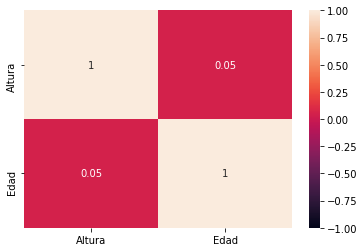

In [44]:
#lista_edad_altura = np.array(lista_edad_altura)
sns.heatmap(df_edad_altura.corr(),
           vmin = -1,
           vmax = 1,
           annot = True)

Se puede ver que la altura y la edad no se correlacionan entre sí para éste conjunto de datos.

## Qué pasa al multiplicar la altura por 2 ?

In [24]:
altura_x_2 = df_edad_altura['Altura']*2

In [25]:
altura_x_2

0     3.32
1     3.74
2     3.56
3     3.20
4     3.58
5     3.72
6     3.08
7     3.22
8     3.04
9     3.64
10    3.54
11    3.40
12    3.56
13    3.26
14    3.46
15    3.70
16    3.56
17    3.40
18    3.28
19    3.64
20    3.62
21    3.60
Name: Altura, dtype: float64

In [26]:
X_altura_x_2 = np.array(altura_x_2)
print(X_altura_x_2)
print(y)

[3.32 3.74 3.56 3.2  3.58 3.72 3.08 3.22 3.04 3.64 3.54 3.4  3.56 3.26
 3.46 3.7  3.56 3.4  3.28 3.64 3.62 3.6 ]
[30 34 31 24 28 27 25 30 32 37 45 28 24 57 29 35 47 24 38 35 28 30]


In [27]:
X_altura_x_2 = X_altura_x_2.reshape(-1, 1)

In [28]:
X_train_altura_x_2, X_test_altura_x_2, y_train_altura_x_2, y_test_altura_x_2 = train_test_split(X_altura_x_2, y, test_size=0.2)

In [29]:
model_altura_x_2 = LinearRegression()
model_altura_x_2.fit(X_train_altura_x_2, y_train_altura_x_2)

LinearRegression()

In [30]:
predict_altura_x_2 = model_altura_x_2.predict(X_test_altura_x_2)

In [31]:
model_altura_x_2.score(X_train_altura_x_2, y_train_altura_x_2) * 100

0.5419685545813069

In [32]:
model_altura_x_2.score(X_test_altura_x_2, y_test_altura_x_2) * 100

-62.844085630706736

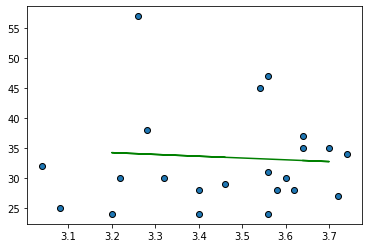

In [33]:
plt.scatter(X_altura_x_2, y, edgecolors= 'black')
plt.plot(X_test_altura_x_2, predict_altura_x_2, c = 'g')

El modelo continúa siendo ineficiente

## Qué pasa al multiplicar la edad por 2 ?

In [34]:
X_edad_x_2 = df_edad_altura['Altura']
y_edad_x_2 = df_edad_altura['Edad']*2

In [35]:
X_edad_x_2 = np.array(X_edad_x_2).reshape(-1, 1)

In [36]:
X_train_edad_x_2, X_test_edad_x_2, y_train_edad_x_2, y_test_edad_x_2 = train_test_split(X_edad_x_2, y_edad_x_2, test_size=0.2)

In [37]:
model_edad_x_2 = LinearRegression()
model_edad_x_2.fit(X_train_edad_x_2, y_train_edad_x_2)

LinearRegression()

In [38]:
predict_edad_x_2 = model_edad_x_2.predict(X_test_edad_x_2)

In [39]:
model_edad_x_2.score(X_train_edad_x_2, y_train_edad_x_2) * 100

0.11167412279841082

In [40]:
model_edad_x_2.score(X_test_edad_x_2, y_test_edad_x_2) * 100

-54.921105284172825

In [41]:
predict_edad_x_2

array([66.40834846, 66.63339383, 66.12704174, 67.646098  , 67.30852995])

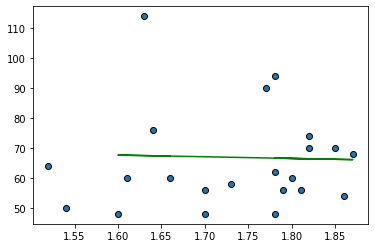

In [42]:
plt.scatter(X_edad_x_2, y_edad_x_2, edgecolors= 'black')
plt.plot(X_test_edad_x_2, predict_edad_x_2, c = 'g')

Nuevamente, se observa que los resultados no son representativos ya que no se presenta una relación entre los datos.